# Give Me Some Credit Project

### Source : https://www.kaggle.com/c/GiveMeSomeCredit

Author : Bastien Roques
&nbsp;

# Prepare Model

### Imports

In [97]:
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from bigml.api import BigML
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy
import kaggle

%matplotlib inline

## Datasets

Import test and train datasets from kaggle

In [98]:
df_train = pd.read_csv('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-train.csv')
df_test = pd.read_csv('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-test.csv')

### Analyze data

In [99]:
df_train.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,1,0.766,45,2,0.803,9120.0,13,0,6,0,2.0,1
1,2,0.957,40,0,0.122,2600.0,4,0,0,0,1.0,0
2,3,0.658,38,1,0.085,3042.0,2,1,0,0,0.0,0
3,4,0.234,30,0,0.036,3300.0,5,0,0,0,0.0,0
4,5,0.907,49,1,0.025,63588.0,7,0,1,0,0.0,0


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
SeriousDlqin2yrs                        150000 non-null int64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [101]:
df_train.describe()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,150000.000,150000.000,150000.000,150000.000,150000.000,1.203e+05,150000.000,150000.000,150000.000,150000.000,146076.000,150000.000
mean,75000.500,6.048,52.295,0.421,353.005,6.670e+03,8.453,0.266,1.018,0.240,0.757,0.067
std,43301.415,249.755,14.772,4.193,2037.819,1.438e+04,5.146,4.169,1.130,4.155,1.115,0.250
min,1.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000
25%,37500.750,0.030,41.000,0.000,0.175,3.400e+03,5.000,0.000,0.000,0.000,0.000,0.000
50%,75000.500,0.154,52.000,0.000,0.367,5.400e+03,8.000,0.000,1.000,0.000,0.000,0.000
75%,112500.250,0.559,63.000,0.000,0.868,8.249e+03,11.000,0.000,2.000,0.000,1.000,0.000
max,150000.000,50708.000,109.000,98.000,329664.000,3.009e+06,58.000,98.000,54.000,98.000,20.000,1.000


<i>min age = 0 is an outlier </i>

In [102]:
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.886,43,0,0.178,5700.0,4,0,0,0,0.0
1,2,NaN,0.463,57,0,0.527,9141.0,15,0,4,0,2.0
2,3,NaN,0.043,59,0,0.688,5083.0,12,0,1,0,2.0
3,4,NaN,0.280,38,1,0.926,3200.0,7,0,2,0,0.0
4,5,NaN,1.000,27,0,0.020,3865.0,4,0,0,0,1.0


In [103]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB


In [104]:
df_test.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000,0.0,101503.000,101503.000,101503.000,101503.000,8.140e+04,101503.000,101503.000,101503.000,101503.000,98877.000
mean,50752.000,NaN,5.310,52.405,0.454,344.475,6.855e+03,8.454,0.297,1.013,0.270,0.769
std,29301.537,NaN,196.156,14.780,4.538,1632.595,3.651e+04,5.144,4.516,1.110,4.504,1.137
min,1.000,NaN,0.000,21.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000
25%,25376.500,NaN,0.030,41.000,0.000,0.173,3.408e+03,5.000,0.000,0.000,0.000,0.000
50%,50752.000,NaN,0.153,52.000,0.000,0.364,5.400e+03,8.000,0.000,1.000,0.000,0.000
75%,76127.500,NaN,0.564,63.000,0.000,0.852,8.200e+03,11.000,0.000,2.000,0.000,1.000
max,101503.000,NaN,21821.000,104.000,98.000,268326.000,7.727e+06,85.000,98.000,37.000,98.000,43.000


#### Objective field distribution in train set

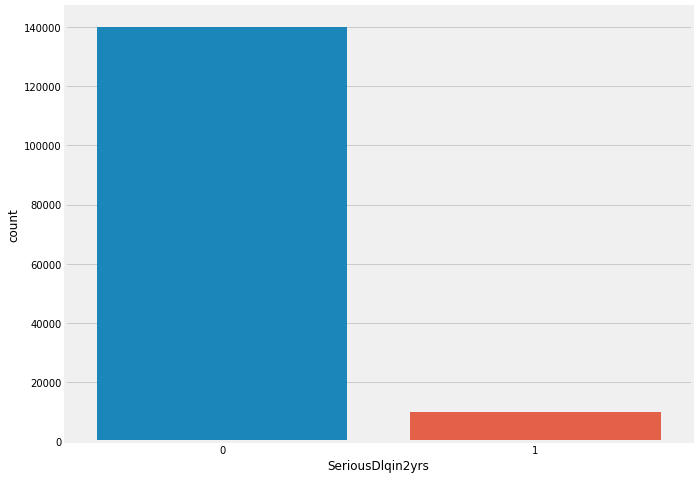

In [105]:
plt.figure(figsize=(10,8))
sn.countplot("SeriousDlqin2yrs", data=df_train)

#### Count positive & negative classes

In [106]:
class_0 = df_train.SeriousDlqin2yrs.value_counts()[0]
class_1 = df_train.SeriousDlqin2yrs.value_counts()[1]
print("Total number of class_0: {}".format(class_0))
print("Total number of class_1: {}".format(class_1))
print("Event rate: {} %".format(class_1/(class_0+class_1) *100))

Total number of class_0: 139974
Total number of class_1: 10026
Event rate: 6.683999999999999 %


#### Pearson Correlation

In [107]:
set_option('display.width', 100)
set_option('precision', 3)
correlations = df_train.corr(method='pearson')
print(correlations)

                                      Unnamed: 0  RevolvingUtilizationOfUnsecuredLines    age  \
Unnamed: 0                             1.000e+00                                 0.002  0.004   
RevolvingUtilizationOfUnsecuredLines   2.372e-03                                 1.000 -0.006   
age                                    4.403e-03                                -0.006  1.000   
NumberOfTime30-59DaysPastDueNotWorse  -5.708e-04                                -0.001 -0.063   
DebtRatio                             -2.906e-03                                 0.004  0.024   
MonthlyIncome                          2.632e-03                                 0.007  0.038   
NumberOfOpenCreditLinesAndLoans        4.586e-03                                -0.011  0.148   
NumberOfTimes90DaysLate               -1.104e-03                                -0.001 -0.061   
NumberRealEstateLoansOrLines          -6.655e-04                                 0.006  0.033   
NumberOfTime60-89DaysPastDueNo

In [108]:
skew = df_train.skew()
print(skew)

Unnamed: 0                              6.018e-17
RevolvingUtilizationOfUnsecuredLines    9.763e+01
age                                     1.890e-01
NumberOfTime30-59DaysPastDueNotWorse    2.260e+01
DebtRatio                               9.516e+01
MonthlyIncome                           1.140e+02
NumberOfOpenCreditLinesAndLoans         1.215e+00
NumberOfTimes90DaysLate                 2.309e+01
NumberRealEstateLoansOrLines            3.482e+00
NumberOfTime60-89DaysPastDueNotWorse    2.333e+01
NumberOfDependents                      1.588e+00
SeriousDlqin2yrs                        3.469e+00
dtype: float64


#### Distribution of each attribute

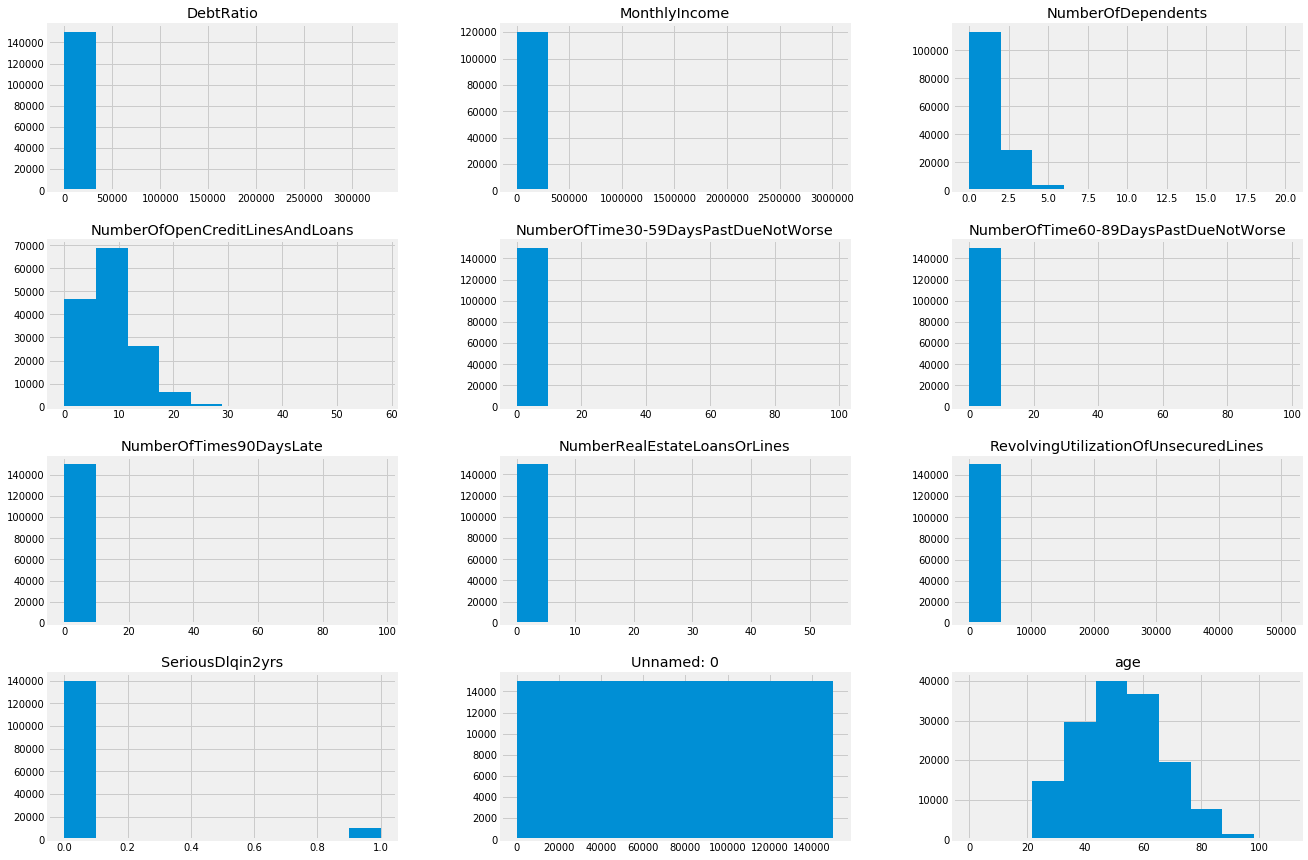

In [109]:
plt.rcParams['figure.figsize'] = [20 , 15]
df_train.hist()
plt.show()

#### Density Plot

<function matplotlib.pyplot.show(*args, **kw)>

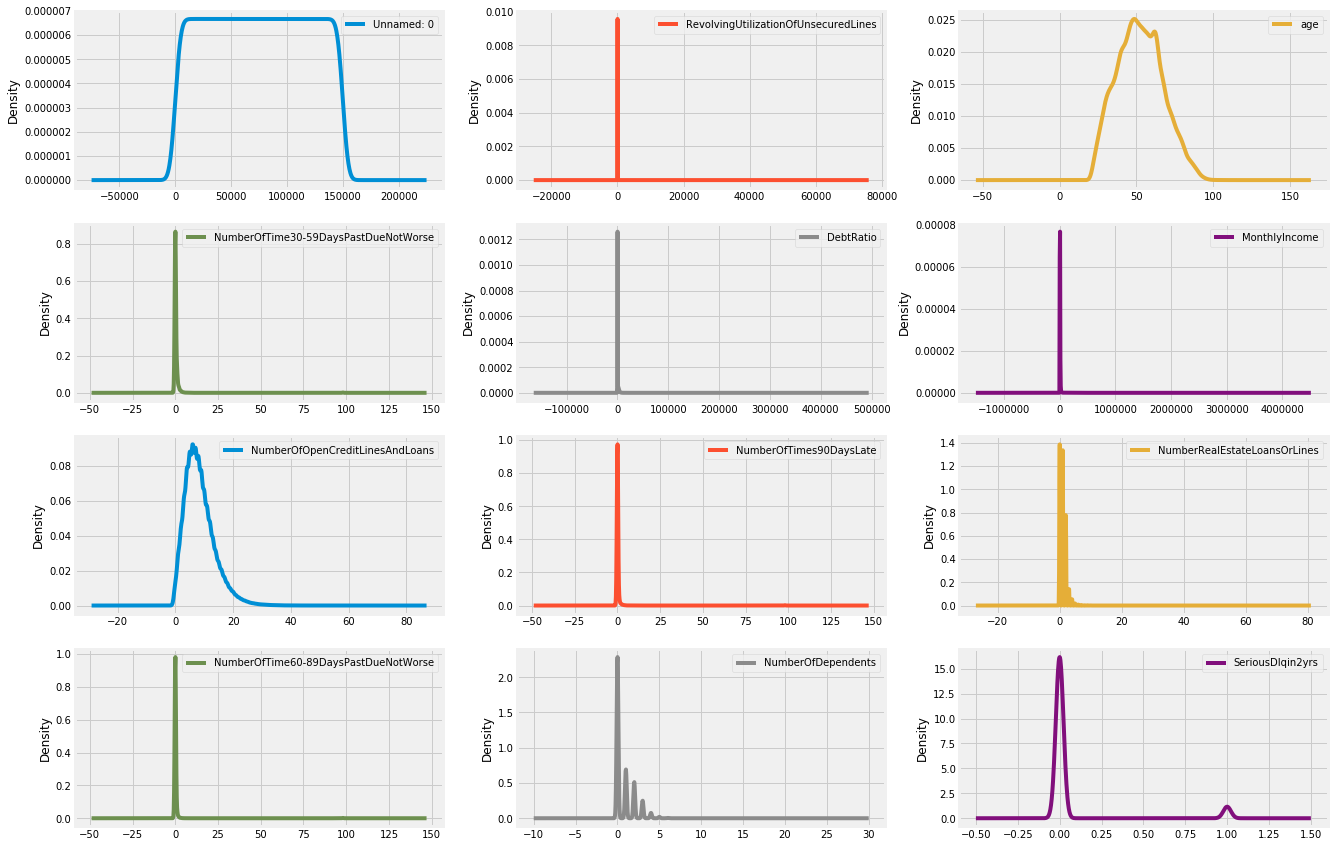

In [110]:
df_train.plot(kind='density', subplots=True, layout=(4,3),  sharex=False)
plt.show

#### Box & Whisker Plots

In [111]:
#df_train.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
#plt.show()

#### Correlation Matrix

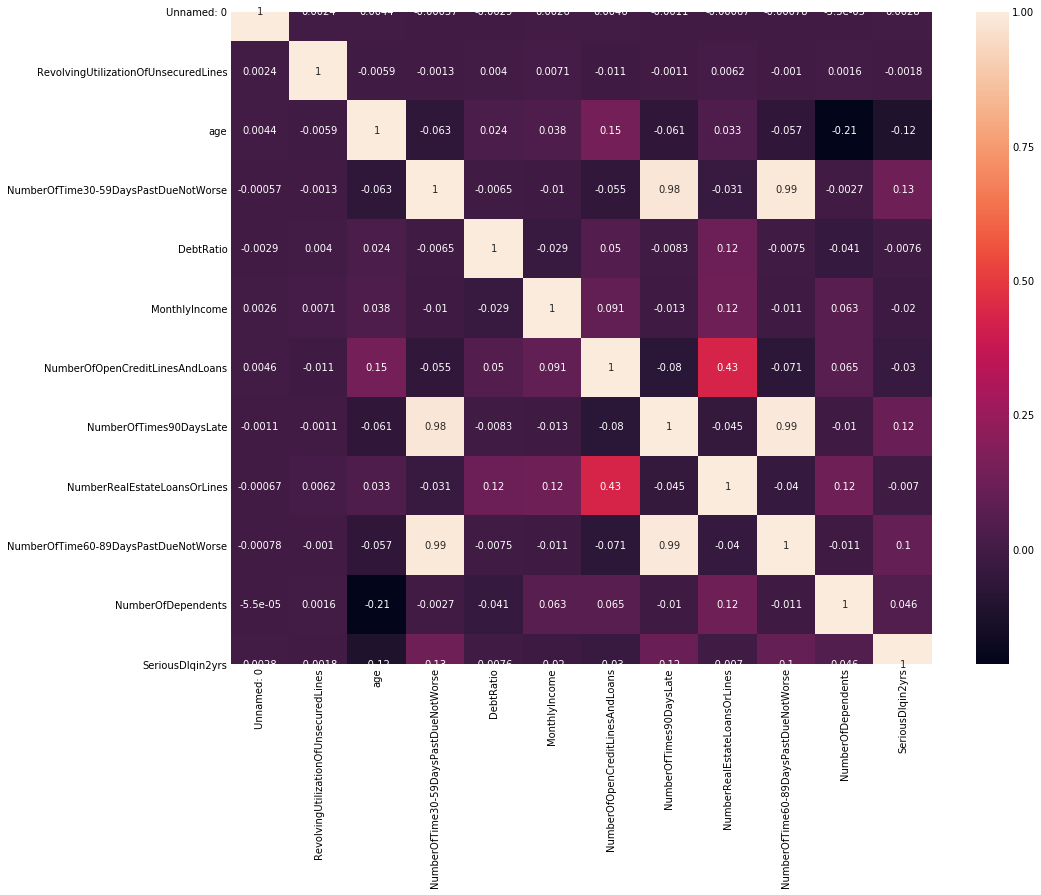

In [112]:
corr = df_train.corr()
plt.figure(figsize=(14,12))
sn.heatmap(corr, annot=True, fmt=".2g")

#### Scatter Plot Matrix

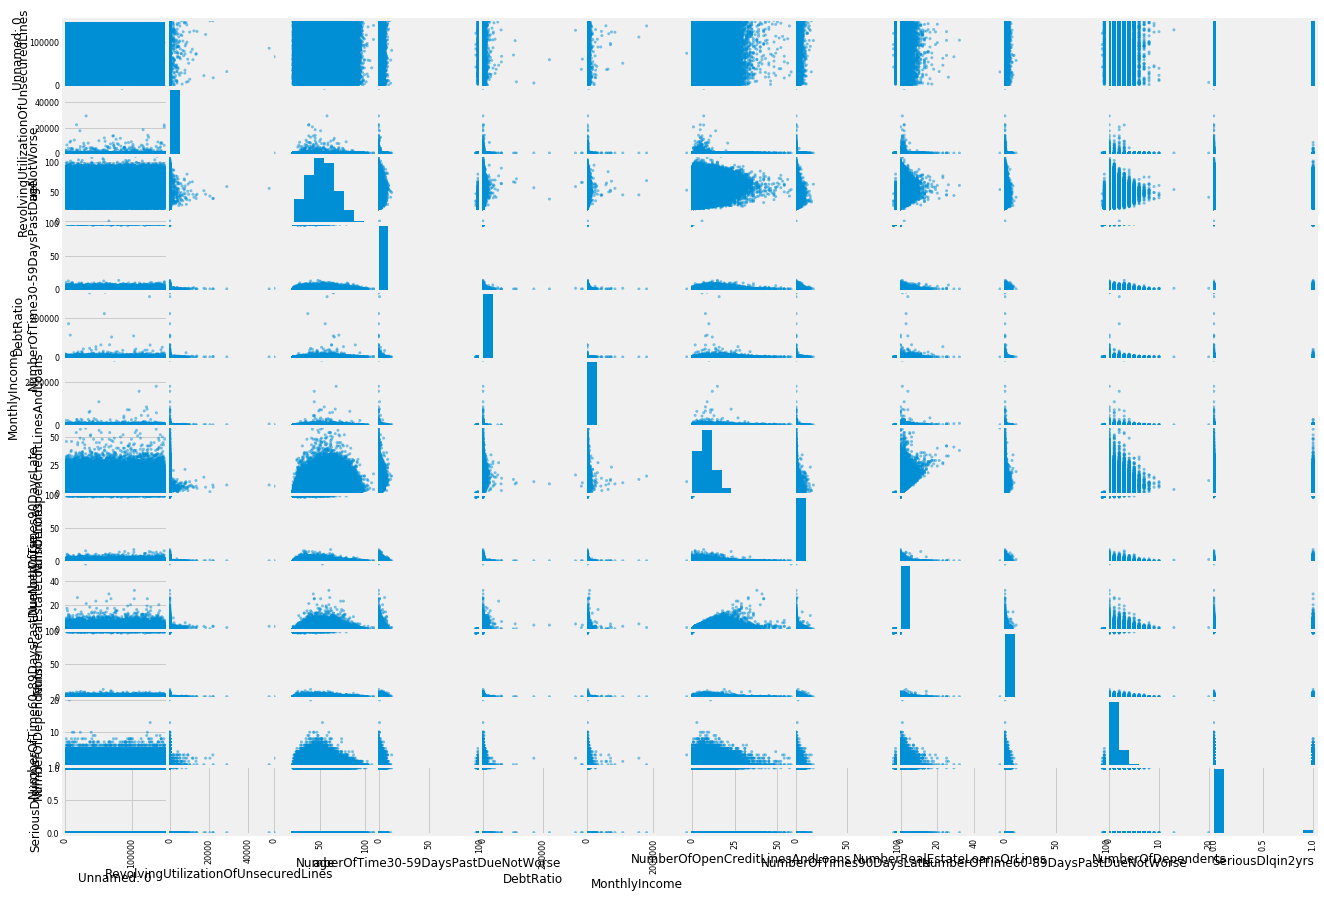

In [113]:
scatter_matrix(df_train)
plt.show()

### Prepare data

In [86]:
# Create a list dataframes
dataframes = [df_train, df_test]

Define column Id

In [87]:
for df in dataframes:
    df.rename( columns={'Unnamed: 0' :'Id'}, inplace=True )

Outlier Age ?

In [88]:
# Less than legal age
df_train.loc[df_train["age"] < 18] 

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
65695,65696,1.0,0,1,0.437,6000.0,6,0,2,0,2.0,0


Edit dataframes

In [89]:
for df in dataframes:
    
    # Age
    df.loc[df["age"] == 0, "age"] = df.age.median()
    df.loc[df.age > 65, 'Senior'] = '1' 
    df.loc[df.age <= 65, 'Senior'] = '0'
    age_working = df.loc[(df["age"] >= 18) & (df["age"] < 65)]
    age_senior = df.loc[(df["age"] >= 65)]
    age_working_impute = age_working.MonthlyIncome.mean()
    age_senior_impute = age_senior.MonthlyIncome.mean()
    
    # MonthlyIncome
    df["MonthlyIncome"] = df["MonthlyIncome"].fillna(99999)
    df.loc[((df["age"] >= 18) & (df["age"] < 65)) & (df["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_working_impute
    df.loc[(df["age"] >= 65) & (df["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute
    
    # Income Per Person
    df['IncomePerPerson'] = df['MonthlyIncome'] / ( df['NumberOfDependents'] + 1 )
    
    # Defaults
    df['CombinedDefaulted'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] + \
                               df['NumberOfTime60-89DaysPastDueNotWorse'] + \
                               df['NumberOfTimes90DaysLate'])
        
    # Credit & Loans
    df["CombinedCreditLoans"] = df["NumberOfOpenCreditLinesAndLoans"] + \
                                df["NumberRealEstateLoansOrLines"]
    
    # Monthly Debt
    df['MonthlyDebt'] = df['DebtRatio'] * df['MonthlyIncome']
    
    # Monthly Balance
    df['MonthlyBalance'] = df['MonthlyIncome'] - df['MonthlyDebt']
    
    # Dependents
    df['NumberOfDependents'] = df['NumberOfDependents'].fillna(0)
    df["NumberOfDependents"] = df["NumberOfDependents"].astype('int64')

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(14,12))
sn.heatmap(corr, annot=True, fmt=".2g")

In [15]:
df_train.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,Senior,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance
0,1,0.766127,45.0,2,0.802982,9120.0,13,0,6,0,2,1,0,3040.0,2,19,7323.197016,1796.802984
1,2,0.957151,40.0,0,0.121876,2600.0,4,0,0,0,1,0,0,1300.0,0,4,316.878123,2283.121877
2,3,0.658180,38.0,1,0.085113,3042.0,2,1,0,0,0,0,0,3042.0,2,2,258.914887,2783.085113
3,4,0.233810,30.0,0,0.036050,3300.0,5,0,0,0,0,0,0,3300.0,0,5,118.963951,3181.036049
4,5,0.907239,49.0,1,0.024926,63588.0,7,0,1,0,0,0,0,63588.0,1,8,1584.975094,62003.024906


In [16]:
df_test.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Senior,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance
0,1,NaN,0.885519,43.0,0,0.177513,5700.0,4,0,0,0,0,0,5700.000000,0,4,1011.822487,4688.177513
1,2,NaN,0.463295,57.0,0,0.527237,9141.0,15,0,4,0,2,0,3047.000000,0,19,4819.472759,4321.527241
2,3,NaN,0.043275,59.0,0,0.687648,5083.0,12,0,1,0,2,0,1694.333333,0,13,3495.312354,1587.687646
3,4,NaN,0.280308,38.0,1,0.925961,3200.0,7,0,2,0,0,0,3200.000000,1,9,2963.074038,236.925962
4,5,NaN,1.000000,27.0,0,0.019917,3865.0,4,0,0,0,1,0,1932.500000,0,4,76.980082,3788.019918


### Export data

In [17]:
df_train.to_csv('csv/Train.csv', index=False)
df_test.to_csv('csv/Test.csv', index=False)

# Train Model

Select project in BigML

In [18]:
api = BigML(project='project/5d9b851042129f40b70001b0')

### Sources

In [19]:
# Create sources
src_train = api.create_source('csv/Train.csv')
src_test = api.create_source('csv/Test.csv')

In [20]:
api.ok(src_train)
api.ok(src_test)

True

### Datasets

Create Train Full and Test Datasets

In [21]:
dataset_args = {"name": "Train Full"}
dataset_train = api.create_dataset(src_train, dataset_args)
dataset_test_args = {"name": "Test"}
dataset_test = api.create_dataset(src_test, dataset_test_args)

Split Train Full Dataset

In [22]:
train_dataset = api.create_dataset(
    dataset_train, {"name": "Train (80%)",
                     "sample_rate": 0.8, "seed": "my seed"})
val_dataset = api.create_dataset(
    dataset_train, {"name": "Val (20%)",
                     "sample_rate": 0.8, "seed": "my seed",
                     "out_of_bag": True})

### Create Model Ensemble

In [23]:
ensemble_args = {"objective_field": "SeriousDlqin2yrs"}
ensemble = api.create_ensemble(train_dataset, ensemble_args)

### Batch prediction

In [24]:
batch_prediction = api.create_batch_prediction(ensemble, val_dataset,
                                               {"all_fields": True})

In [25]:
api.ok(batch_prediction)

True

Save batch prediction

In [26]:
api.download_batch_prediction(batch_prediction,
                              filename='csv/predictions_train_with_val.csv')

'csv/predictions_train_with_val.csv'

Batch prediction with probabilities

In [27]:
batch_prediction_evaluation = api.create_batch_prediction(ensemble, val_dataset,
                                               {"all_fields": True, 
                                                "header": True,
                                                "confidence": True,
                                                "probabilities": True})

In [28]:
api.ok(batch_prediction_evaluation)

True

Save batch prediction with probabilities

In [29]:
api.download_batch_prediction(batch_prediction_evaluation,
                              filename='csv/my_predictions_evaluation.csv')

'csv/my_predictions_evaluation.csv'

# Evaluate Model

In [30]:
df_evaluation_with_proba = read_csv('csv/my_predictions_evaluation.csv')

df_evaluation_with_proba.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,Senior,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs.1,confidence,0 probability,1 probability
0,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,0,63588.0,1,8,1584.975094,62003.024906,0,0.72118,0.79219,0.20781
1,20,0.602794,25,0,0.065868,333.0,2,0,0,0,...,0,333.0,0,2,21.934132,311.065868,0,0.92199,0.94990,0.05011
2,27,0.052436,58,0,0.097672,8333.0,22,0,1,0,...,0,8333.0,0,23,813.902326,7519.097674,0,0.98379,0.99050,0.00950
3,28,0.034421,69,0,0.042383,2500.0,17,0,0,0,...,1,1250.0,0,17,105.957617,2394.042382,0,0.98454,0.99129,0.00871
4,31,0.704074,28,1,0.155201,4200.0,8,0,0,0,...,0,4200.0,1,8,651.844801,3548.155199,0,0.83925,0.86418,0.13582


Rename target with Actual and Predicted

In [33]:
df_evaluation_with_proba.rename(columns = {list(df_evaluation_with_proba)[11]:'SeriousDlqin2yrs_Actual'}, inplace=True)
df_evaluation_with_proba.rename(columns = {list(df_evaluation_with_proba)[18]:'SeriousDlqin2yrs_Predicted'}, inplace=True)
df_evaluation_with_proba

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,Senior,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability
0,5,0.907239,49,1,0.024926,63588.000000,7,0,1,0,...,0,63588.000000,1,8,1.584975e+03,6.200302e+04,0,0.72118,0.79219,0.20781
1,20,0.602794,25,0,0.065868,333.000000,2,0,0,0,...,0,333.000000,0,2,2.193413e+01,3.110659e+02,0,0.92199,0.94990,0.05011
2,27,0.052436,58,0,0.097672,8333.000000,22,0,1,0,...,0,8333.000000,0,23,8.139023e+02,7.519098e+03,0,0.98379,0.99050,0.00950
3,28,0.034421,69,0,0.042383,2500.000000,17,0,0,0,...,1,1250.000000,0,17,1.059576e+02,2.394042e+03,0,0.98454,0.99129,0.00871
4,31,0.704074,28,1,0.155201,4200.000000,8,0,0,0,...,0,4200.000000,1,8,6.518448e+02,3.548155e+03,0,0.83925,0.86418,0.13582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,149964,0.230353,61,0,883.000000,6759.138224,15,0,0,0,...,0,2253.046075,0,15,5.968319e+06,-5.961560e+06,0,0.96823,0.97838,0.02162
29996,149972,0.058001,83,0,0.013997,5000.000000,6,0,0,0,...,1,5000.000000,0,6,6.998601e+01,4.930014e+03,0,0.99506,0.99683,0.00317
29997,149976,0.022088,58,0,2716.000000,6759.138224,8,0,2,0,...,0,6759.138224,0,10,1.835782e+07,-1.835106e+07,0,0.99391,0.99619,0.00381
29998,149986,0.954409,26,0,0.324962,1950.000000,4,0,0,0,...,0,1950.000000,0,4,6.336750e+02,1.316325e+03,0,0.90537,0.92436,0.07564


## Compute Confusion matrix

Create column Error 

In [34]:
df_evaluation_with_proba['Error'] = ""
df_evaluation_with_proba

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
0,5,0.907239,49,1,0.024926,63588.000000,7,0,1,0,...,63588.000000,1,8,1.584975e+03,6.200302e+04,0,0.72118,0.79219,0.20781,
1,20,0.602794,25,0,0.065868,333.000000,2,0,0,0,...,333.000000,0,2,2.193413e+01,3.110659e+02,0,0.92199,0.94990,0.05011,
2,27,0.052436,58,0,0.097672,8333.000000,22,0,1,0,...,8333.000000,0,23,8.139023e+02,7.519098e+03,0,0.98379,0.99050,0.00950,
3,28,0.034421,69,0,0.042383,2500.000000,17,0,0,0,...,1250.000000,0,17,1.059576e+02,2.394042e+03,0,0.98454,0.99129,0.00871,
4,31,0.704074,28,1,0.155201,4200.000000,8,0,0,0,...,4200.000000,1,8,6.518448e+02,3.548155e+03,0,0.83925,0.86418,0.13582,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,149964,0.230353,61,0,883.000000,6759.138224,15,0,0,0,...,2253.046075,0,15,5.968319e+06,-5.961560e+06,0,0.96823,0.97838,0.02162,
29996,149972,0.058001,83,0,0.013997,5000.000000,6,0,0,0,...,5000.000000,0,6,6.998601e+01,4.930014e+03,0,0.99506,0.99683,0.00317,
29997,149976,0.022088,58,0,2716.000000,6759.138224,8,0,2,0,...,6759.138224,0,10,1.835782e+07,-1.835106e+07,0,0.99391,0.99619,0.00381,
29998,149986,0.954409,26,0,0.324962,1950.000000,4,0,0,0,...,1950.000000,0,4,6.336750e+02,1.316325e+03,0,0.90537,0.92436,0.07564,


Define values for column Error

In [35]:
def error_values(row):
    
    actual = row['SeriousDlqin2yrs_Actual']
    predicted = row['SeriousDlqin2yrs_Predicted']
    if actual == 1 and actual == predicted:
        row['Error'] = "TP"
    elif actual == 1 and predicted == 0:
        row['Error'] = "FN"
    elif actual == 0 and predicted == 1:
        row['Error'] = "FP"
    else:
        row['Error'] = "TN"
        
    return row['Error']

Insert values in column Error

In [36]:
df_evaluation_with_proba['Error'] = df_evaluation_with_proba.apply(error_values, axis=1)
df_evaluation_with_proba
df_evaluation_with_proba.to_csv('csv/eval_with_proba.csv', index=False)

In [37]:
# Count TP, FN, FP, TN
df_evaluation_with_proba.groupby(['Error']).Error.count()

Error
FN     1682
FP      254
TN    27731
TP      333
Name: Error, dtype: int64

In [38]:
# Count TP, FN, FP, TN
df_evaluation_with_proba.groupby(['Error']).Error.count()
total_errors = df_evaluation_with_proba.groupby(['Error']).Error.count()

In [39]:
df_evaluation_with_proba

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
0,5,0.907239,49,1,0.024926,63588.000000,7,0,1,0,...,63588.000000,1,8,1.584975e+03,6.200302e+04,0,0.72118,0.79219,0.20781,TN
1,20,0.602794,25,0,0.065868,333.000000,2,0,0,0,...,333.000000,0,2,2.193413e+01,3.110659e+02,0,0.92199,0.94990,0.05011,TN
2,27,0.052436,58,0,0.097672,8333.000000,22,0,1,0,...,8333.000000,0,23,8.139023e+02,7.519098e+03,0,0.98379,0.99050,0.00950,TN
3,28,0.034421,69,0,0.042383,2500.000000,17,0,0,0,...,1250.000000,0,17,1.059576e+02,2.394042e+03,0,0.98454,0.99129,0.00871,TN
4,31,0.704074,28,1,0.155201,4200.000000,8,0,0,0,...,4200.000000,1,8,6.518448e+02,3.548155e+03,0,0.83925,0.86418,0.13582,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,149964,0.230353,61,0,883.000000,6759.138224,15,0,0,0,...,2253.046075,0,15,5.968319e+06,-5.961560e+06,0,0.96823,0.97838,0.02162,TN
29996,149972,0.058001,83,0,0.013997,5000.000000,6,0,0,0,...,5000.000000,0,6,6.998601e+01,4.930014e+03,0,0.99506,0.99683,0.00317,TN
29997,149976,0.022088,58,0,2716.000000,6759.138224,8,0,2,0,...,6759.138224,0,10,1.835782e+07,-1.835106e+07,0,0.99391,0.99619,0.00381,TN
29998,149986,0.954409,26,0,0.324962,1950.000000,4,0,0,0,...,1950.000000,0,4,6.336750e+02,1.316325e+03,0,0.90537,0.92436,0.07564,TN


### Filter Errors

In [40]:
# Select only FP and FN values for column Error
FP_or_FN = (df_evaluation_with_proba['Error'] == 'FN') | (df_evaluation_with_proba['Error'] == 'FP')

# Create new df with only FP and FN values for column Error
df_error = df_evaluation_with_proba.loc[FP_or_FN]
df_error

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
11,89,0.734478,45,0,0.591478,4716.0,13,0,2,0,...,1572.000000,0,15,2789.408522,1926.591478,0,0.84879,0.87469,0.12531,FN
30,227,1.953488,38,0,0.153500,3556.0,5,0,0,0,...,1185.333333,0,5,545.846501,3010.153499,0,0.74143,0.79892,0.20108,FN
34,241,0.973339,61,1,0.209962,5500.0,11,0,0,1,...,2750.000000,2,11,1154.790037,4345.209963,0,0.67672,0.70998,0.29002,FN
57,335,0.037198,47,0,0.039758,25000.0,11,0,1,0,...,6250.000000,0,12,993.960250,24006.039750,0,0.98715,0.99155,0.00845,FN
60,353,0.507973,69,2,0.193935,3000.0,10,2,0,2,...,3000.000000,6,10,581.806065,2418.193935,1,0.58923,0.36774,0.63226,FP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29878,149396,0.844279,76,3,0.125373,2009.0,14,2,0,0,...,2009.000000,5,14,251.874626,1757.125374,1,0.51799,0.43439,0.56562,FP
29881,149439,0.705074,35,0,0.114565,3377.0,5,0,0,0,...,844.250000,0,5,386.885434,2990.114566,0,0.92091,0.93955,0.06045,FN
29908,149559,0.837702,66,0,0.935768,5666.0,14,0,3,0,...,5666.000000,0,17,5302.064230,363.935770,0,0.89495,0.92095,0.07905,FN
29929,149665,0.840021,54,0,0.904777,3181.0,10,0,3,0,...,3181.000000,0,13,2878.095223,302.904777,0,0.86964,0.90008,0.09992,FN


In [41]:
df_error.assign(Probability = '')

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
11,89,0.734478,45,0,0.591478,4716.0,13,0,2,0,...,0,15,2789.408522,1926.591478,0,0.84879,0.87469,0.12531,FN,
30,227,1.953488,38,0,0.153500,3556.0,5,0,0,0,...,0,5,545.846501,3010.153499,0,0.74143,0.79892,0.20108,FN,
34,241,0.973339,61,1,0.209962,5500.0,11,0,0,1,...,2,11,1154.790037,4345.209963,0,0.67672,0.70998,0.29002,FN,
57,335,0.037198,47,0,0.039758,25000.0,11,0,1,0,...,0,12,993.960250,24006.039750,0,0.98715,0.99155,0.00845,FN,
60,353,0.507973,69,2,0.193935,3000.0,10,2,0,2,...,6,10,581.806065,2418.193935,1,0.58923,0.36774,0.63226,FP,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29878,149396,0.844279,76,3,0.125373,2009.0,14,2,0,0,...,5,14,251.874626,1757.125374,1,0.51799,0.43439,0.56562,FP,
29881,149439,0.705074,35,0,0.114565,3377.0,5,0,0,0,...,0,5,386.885434,2990.114566,0,0.92091,0.93955,0.06045,FN,
29908,149559,0.837702,66,0,0.935768,5666.0,14,0,3,0,...,0,17,5302.064230,363.935770,0,0.89495,0.92095,0.07905,FN,
29929,149665,0.840021,54,0,0.904777,3181.0,10,0,3,0,...,0,13,2878.095223,302.904777,0,0.86964,0.90008,0.09992,FN,


In [42]:
def add_proba(row):

    if row['Error'] == "FP":
        row['Probability'] = row['1 probability'] 
    else:
        row['Probability'] = row['0 probability'] 
    
    return row['Probability']

In [43]:
df_error.loc[:, ('Probability')] = df_error.apply(add_proba, axis=1)
df_error

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
11,89,0.734478,45,0,0.591478,4716.0,13,0,2,0,...,0,15,2789.408522,1926.591478,0,0.84879,0.87469,0.12531,FN,0.87469
30,227,1.953488,38,0,0.153500,3556.0,5,0,0,0,...,0,5,545.846501,3010.153499,0,0.74143,0.79892,0.20108,FN,0.79892
34,241,0.973339,61,1,0.209962,5500.0,11,0,0,1,...,2,11,1154.790037,4345.209963,0,0.67672,0.70998,0.29002,FN,0.70998
57,335,0.037198,47,0,0.039758,25000.0,11,0,1,0,...,0,12,993.960250,24006.039750,0,0.98715,0.99155,0.00845,FN,0.99155
60,353,0.507973,69,2,0.193935,3000.0,10,2,0,2,...,6,10,581.806065,2418.193935,1,0.58923,0.36774,0.63226,FP,0.63226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29878,149396,0.844279,76,3,0.125373,2009.0,14,2,0,0,...,5,14,251.874626,1757.125374,1,0.51799,0.43439,0.56562,FP,0.56562
29881,149439,0.705074,35,0,0.114565,3377.0,5,0,0,0,...,0,5,386.885434,2990.114566,0,0.92091,0.93955,0.06045,FN,0.93955
29908,149559,0.837702,66,0,0.935768,5666.0,14,0,3,0,...,0,17,5302.064230,363.935770,0,0.89495,0.92095,0.07905,FN,0.92095
29929,149665,0.840021,54,0,0.904777,3181.0,10,0,3,0,...,0,13,2878.095223,302.904777,0,0.86964,0.90008,0.09992,FN,0.90008


Sort errors by values (desc)

In [44]:
df_error.sort_values(by = 'Probability', ascending=False, inplace=True)
df_error

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
25634,128521,0.009786,78,0,9.000000,6277.341638,2,0,0,0,...,0,2,5.649607e+04,-5.021873e+04,0,0.99580,0.99747,0.00254,FN,0.99747
4536,22960,0.012144,69,0,3120.000000,6277.341638,10,0,1,0,...,0,11,1.958531e+07,-1.957903e+07,0,0.99514,0.99740,0.00260,FN,0.99740
3596,18375,0.003510,49,0,0.000174,11482.000000,2,0,0,0,...,0,2,1.999831e+00,1.148000e+04,0,0.99458,0.99726,0.00275,FN,0.99726
1610,8399,0.026069,70,0,2673.000000,6277.341638,11,0,2,0,...,0,13,1.677933e+07,-1.677306e+07,0,0.99403,0.99654,0.00346,FN,0.99654
2732,13959,0.108742,62,0,0.060387,7600.000000,12,0,0,0,...,0,12,4.589396e+02,7.141060e+03,0,0.99339,0.99623,0.00377,FN,0.99623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869,39254,1.051793,38,2,0.332022,1779.000000,2,1,0,0,...,3,2,5.906680e+02,1.188332e+03,1,0.44995,0.49771,0.50229,FP,0.50229
14218,70621,1.000000,33,1,60.000000,6759.138224,0,1,0,2,...,4,0,4.055483e+05,-3.987892e+05,0,0.44822,0.50163,0.49837,FN,0.50163
12513,62373,1.000000,37,1,0.067435,2950.000000,3,2,0,0,...,3,3,1.989326e+02,2.751067e+03,1,0.44639,0.49892,0.50108,FP,0.50108
6610,33341,1.000000,48,1,128.000000,6759.138224,2,2,0,0,...,3,2,8.651697e+05,-8.584106e+05,1,0.44891,0.49896,0.50104,FP,0.50104


### Extract 100 biggest errors

In [45]:
df_error_100 = df_error.head(100)
df_error_100.to_csv('csv/100_biggest_errors.csv')

### Cost matrix

In [46]:
# Costs are calculated
cout_fn = total_errors['FN'] * (-500)
cout_fp = total_errors['FP'] * (-2500)
cout_tn = total_errors['TN'] * 500
cout_tp = total_errors['TP'] * 0

print('FN :',cout_fn) 
print('FP :',cout_fp) 
print('TN :',cout_tn)
print('TP :',cout_tp)

FN : -841000
FP : -635000
TN : 13865500
TP : 0


In [47]:
gain = cout_fn + cout_fp + cout_tn + cout_tp
gain

12389500

In [48]:
def cost_threshold(threshold):
    
    prediction_threshold = df_evaluation_with_proba['1 probability'] > threshold

    is_P_pred = prediction_threshold
    is_N_pred = ~prediction_threshold

    is_P_real = (df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 1)
    is_N_real = (df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 0)

    TP = len(df_evaluation_with_proba.loc[is_P_pred & is_P_real])
    TN = len(df_evaluation_with_proba.loc[is_N_pred & is_N_real])
    FP = len(df_evaluation_with_proba.loc[is_P_pred & is_N_real])
    FN = len(df_evaluation_with_proba.loc[is_N_pred & is_P_real])

    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = TP * TP_cost
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost

    return cost

### Learning curve

<function matplotlib.pyplot.show(*args, **kw)>

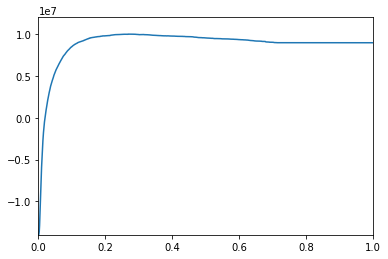

In [49]:

table = [cost_threshold(n/3000) for n in range(0,3000)]
threshold = [n/3000 for n in range(0,3000)]
plt.axis([0, 1,min(table),1.2*max(table)])
plt.plot(threshold, table)
plt.show

In [50]:
max_val = max(table)
max_threshold = table.index(max_val)/3000
print(f'Le gain maximum est {max_val} et il est obtenu en {max_threshold}')

Le gain maximum est 9990000 et il est obtenu en 0.26766666666666666


# Analyze Errors (100 biggest)

   * 100% have no NumberOfTimes30DaysOrLater
   * 75% More than 6 NumberOfOpenCreditLinesAndLoans
   * 80% More than 40 years old
   * 60% More thant 50 years old 
   * 20% had 0 in MontlyIncome et and had been updated with 0.3 in DebtRatio
      * include 50% have > 0.3 in DebtRatio

### Compute AUC

In [51]:
df_evaluation_with_proba.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerPerson,CombinedDefaulted,CombinedCreditLoans,MonthlyDebt,MonthlyBalance,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
0,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,63588.0,1,8,1584.975094,62003.024906,0,0.72118,0.79219,0.20781,TN
1,20,0.602794,25,0,0.065868,333.0,2,0,0,0,...,333.0,0,2,21.934132,311.065868,0,0.92199,0.94990,0.05011,TN
2,27,0.052436,58,0,0.097672,8333.0,22,0,1,0,...,8333.0,0,23,813.902326,7519.097674,0,0.98379,0.99050,0.00950,TN
3,28,0.034421,69,0,0.042383,2500.0,17,0,0,0,...,1250.0,0,17,105.957617,2394.042382,0,0.98454,0.99129,0.00871,TN
4,31,0.704074,28,1,0.155201,4200.0,8,0,0,0,...,4200.0,1,8,651.844801,3548.155199,0,0.83925,0.86418,0.13582,TN


In [52]:
def calculate_auc():
    p = df_evaluation_with_proba.loc[df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 1]
    n = df_evaluation_with_proba.loc[df_evaluation_with_proba['SeriousDlqin2yrs_Actual'] == 0]

    x_sup_y = 0
    total_combinations = 0
    
    for threshold_p in p['1 probability']:
        for threshold_n in n['1 probability']:
            if threshold_p > threshold_n:
                x_sup_y += 1
            total_combinations += 1
    auc = x_sup_y/total_combinations
    return auc            

In [53]:
print(f'AUC: {calculate_auc()}')

AUC: 0.8562081689455224


## Evaluate Model with Test set

In [54]:
evaluation = api.create_evaluation(ensemble, val_dataset)

In [55]:
api.ok(evaluation)

True

### Compute AUC

In [56]:
AUC : api.pprint(evaluation['object']['result']['model']['average_area_under_roc_curve'])

0.8564


### Create Ensemble Model

In [57]:
ensemble_args = {"objective_field": "SeriousDlqin2yrs"}
ensemble = api.create_ensemble(train_dataset, ensemble_args)

### Batch prediction

In [58]:
batch_prediction = api.create_batch_prediction(ensemble, dataset_test,
                                               {"output_fields": ["Id"], "probabilities": True})


In [59]:
api.ok(batch_prediction)

True

### Export batch prediction

In [60]:
api.download_batch_prediction(batch_prediction,
                              filename='csv/predictions_train_with_test.csv')


'csv/predictions_train_with_test.csv'

## Kaggle

In [61]:
! cp kaggle.json ~/.kaggle/

In [62]:
! chmod 600 ~/.kaggle/kaggle.json

In [63]:
! ls ~/.kaggle

kaggle.json


### Create submission file

Edit dataframe 

In [64]:
df_kaggle = read_csv('csv/predictions_train_with_test.csv')
df_kaggle = df_kaggle.drop(["SeriousDlqin2yrs", "0 probability"], axis=1)
df_kaggle = df_kaggle.rename(columns={"1 probability": "Probability"})
df_kaggle.head()


,Id,Probability
0,1,0.07263
1,2,0.04677
2,3,0.01439
3,4,0.05427
4,5,0.09473


Export dataframe to csv

In [65]:
df_kaggle.to_csv('csv/kaggle_predictions.csv', index=False)

### Send predictions to kaggle

In [66]:
submission_file='csv/kaggle_predictions.csv'
kaggle.api.competition_submit(submission_file, "BigML Ensemble", "GiveMeSomeCredit")

100%|██████████| 1.66M/1.66M [00:05<00:00, 325kB/s]


Successfully submitted to Give Me Some Credit